# **Documentation**

https://htrc.stoplight.io/docs/ef-api/0948b1add4a6c-volume-metadata

METADATA

In [ ]:
api_meta = "https://tools.htrc.illinois.edu/ef-api/worksets/640ba4bf300000440a5ce31a/metadata"
response = requests.get(api_url)
response.json()

## Volumes

In [ ]:
api_meta = "https://tools.htrc.illinois.edu/ef-api/worksets/640ba4bf300000440a5ce31a/volumes"
response = requests.get(api_url)
response.json()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json

with open('/content/drive/MyDrive/TORCHLITE/History of Black Writers Workset Sample.json', 'r') as file:
    black_writers = json.load(file)


In [ ]:
black_writers_list = black_writers['data']

https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/


- CC coordinating conjunction
- CD cardinal digit
- DT determiner
- EX existential there (like: “there is” … think of it like “there exists”)
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective – ‘big’
- JJR adjective, comparative – ‘bigger’
- JJS adjective, superlative – ‘biggest’
- LS list marker 1)
- MD modal – could, will
- NN noun, singular ‘- desk’
- NNS noun plural – ‘desks’
- NNP proper noun, singular – ‘Harrison’
- NNPS proper noun, plural – ‘Americans’
- PDT predeterminer – ‘all the kids’
- POS possessive ending parent’s
- PRP personal pronoun –  I, he, she
- PRP possessive pronoun – my, his, hers
- RB adverb – very, silently,
- RBR adverb, comparative – better
- RBS adverb, superlative – best
- RP particle – give up
- TO – to go ‘to’ the store.
- UH interjection – errrrrrrrm
- VB verb, base form – take
- VBD verb, past tense – took
- VBG verb, gerund/present participle – taking
- VBN verb, past participle – taken
- VBP verb, sing. present, non-3d – take
- VBZ verb, 3rd person sing. present – takes
- WDT wh-determiner – which
- WP wh-pronoun – who, what
- WP$ possessive wh-pronoun, eg- whose
- WRB wh-adverb, eg- where, when

### need following to make the plot


*   JJ
*   JJR
*   JJS
*   NN
*   NNS
*   NNP
*   NNPS
*   RB
*   RBR
*  RBC
*   VB








pubDate


In [ ]:
wanted_types = ["JJ"]


book_to_word_count = {}
for book in black_writers_list:
  book_title = book['metadata']['title']
  book_pubDate = book['metadata']['pubDate']
  pages_of_book = book['features']['pages']
  word_count = {}
  for page in pages_of_book:
    body_page = page['body']
    if body_page is not None:
      filtered_data = {key: value for key, value in body_page["tokenPosCount"].items() if any(k in value for k in wanted_types)}
      for word, word_obj in filtered_data.items():
        for _, count in word_obj.items():
          if not word in word_count:
            word_count[word] = count
          else:
            word_count[word] += count
  book_to_word_count[book_title+'@'+str(book_pubDate)] = word_count


In [ ]:
# printing
for b, wc in book_to_word_count.items():
  print(b)
  print(wc)

Portrait of a young man drowning.@1962
{'Unmityof': 1, 'YOUNG': 1, 'brown': 5, 'quick': 32, 'wild': 10, 'mine': 4, 'own': 31, 'same': 54, 'poor': 14, 'MYSELF': 3, 'scared': 22, 'slow': 9, 'big': 139, 'loud': 7, 'strong': 7, 'safe': 9, 'open': 46, 'ashamed': 18, 'raw': 4, 'round': 2, 'high': 11, 'dirty': 29, 'good': 221, 'warm': 15, 'clean': 29, 'fat': 16, 'little': 217, 'German': 1, 'stupid': 8, 'other': 97, 'red': 16, 'mad': 9, 'funny': 29, 'Italian': 3, 'hungry': 14, 'Strange': 2, 'different': 23, 'crowded': 1, 'old': 112, 'dark': 42, 'crazy': 37, 'strange': 18, 'new': 40, 'sorry': 61, 'great': 20, 'skinny': 3, 'afraid': 28, 'angry': 22, 'fuzzy': 1, 'nice': 101, 'soft': 12, 'happy': 20, 'magic': 9, 'white': 15, 'sweet': 22, 'full': 31, 'smart': 13, 'sharp': 10, 'bright': 13, 'wet': 9, 'long': 63, 'tired': 28, 'much': 81, 'next': 32, 'many': 34, 'filthy': 17, 'sleepy': 3, 'front': 26, 'glad': 20, 'bad': 44, 'upset': 7, 'tight': 31, 'sick': 14, 'sure': 94, 'rich': 6, 'precious': 2, 'ha

In [ ]:
year_to_word_count = {}
year_to_word_count[20] = {}
year_to_word_count[21] = {}
for b, wc in book_to_word_count.items():
  year_of_book = b.split('@')[1]
  year_of_book_prefix = int(year_of_book[:2])
  if year_of_book_prefix == 19:
    year_to_word_count[20] = {k: wc.get(k, 0) + year_to_word_count[20].get(k, 0) for k in set(wc) | set(year_to_word_count[20])}
  elif year_of_book_prefix == 20:
    year_to_word_count[21] = {k: wc.get(k, 0) + year_to_word_count[21].get(k, 0) for k in set(wc) | set(year_to_word_count[21])}
  else:
    print("Invalid book year:" + year_of_book)

In [ ]:
# printing
for year, wc in year_to_word_count.items():
  print(year)
  print(wc)

20
{'diminutive': 3, 'Ba-roooml': 1, 'finger-writing': 1, 'marine': 6, 'two-story': 1, 'Wicked': 2, 'adopted': 2, 'unavoidable': 1, 'bouncy': 1, 'over-and-over-again': 1, 'rapid': 21, 'Barren': 1, 'lifeless': 7, 'Fifth': 1, 'gaseous': 1, 'undisclosed': 2, 'hidin': 2, 'lamp-lit': 1, 'French-fried': 1, 'flattered': 2, 'black-gritted': 1, 'diﬂerent': 1, 'year-old': 1, 'khaki-clad': 1, 'strident': 1, 'strung-up': 1, 'Adamite': 1, 'monkish': 4, 'Hell-lo': 1, 'gold-filled': 1, 'Fast': 4, 'forcible': 3, 'five-piece': 1, 'slow': 108, 'ting-aIing-a-ling': 1, 'ﬁnished': 1, 'frightening': 19, 'simultaneous': 2, 'unbending': 1, 'whiter-skinned': 1, 'Gleaming': 2, 'tere': 2, 'bodacious': 1, 'animal': 2, 'tribal': 2, 'unequal': 5, 'loose': 82, 'moonlit': 4, 'big-foot': 1, 'uncharitable': 1, 'pleased': 55, 'overbearing': 1, 'phoenixlike': 1, 'hospitable': 1, 'fullblooded': 1, 'devil-will-get-you': 1, 'translucent': 1, 'buff-colored': 1, 'candlelike': 1, 'clinching': 1, '50th': 3, 'highpitched': 1, 't

In [ ]:
# intersection, extracted common words
common_words = year_to_word_count[20].keys() & year_to_word_count[21].keys()
century_20_common_wc = {k: year_to_word_count[20][k] for k in common_words}
century_21_common_wc = {k: year_to_word_count[21][k] for k in common_words}

print(century_20_common_wc)
print(century_21_common_wc)

{'frothy': 4, 'lustful': 2, 'marine': 6, 'two-story': 1, 'helluva': 11, 'winded': 1, 'unavoidable': 1, 'bouncy': 1, 'rapid': 21, 'lifeless': 7, 'heinous': 4, 'ignorant': 27, 'flattered': 2, 'side': 10, 'heavy-set': 1, 'disgusted': 12, 'professional': 24, 'Fast': 4, 'slow': 108, 'frightening': 19, 'murky': 6, 'adequate': 7, 'responsive': 1, 'Civil': 13, 'sincere': 11, 'rival': 3, 'tribal': 2, 'trim': 10, 'total': 40, 'chalky': 1, 'wiry': 7, 'loose': 82, 'sour': 26, 'annual': 7, 'limited': 7, 'faint': 34, 'pleased': 55, 'unblinking': 9, 'translucent': 1, 'tight': 136, 'dry': 94, 'noonday': 1, 'roasted': 1, 'unlimited': 1, 'myriad': 7, 'plentiful': 2, 'amorphous': 1, 'well-cut': 2, 'exotic': 10, 'girlish': 4, 'surgical': 1, 'cut-glass': 2, 'Sharp': 6, 'much': 863, 'indifferent': 6, 'Terrible': 3, 'sanitary': 1, 'weak': 74, 'twenty-fifth': 1, 'agricultural': 18, 'attendant': 3, 'unbearable': 9, 'kind': 19, 'funeral': 10, 'inverted': 1, 'reckless': 7, 'unfriendly': 1, 'fine': 196, 'gloomy':

In [ ]:
# from operator import itemgetter
# top_n_frequency = 20
# top_frequency_filtered_book_to_word_count = {}
# for b, wc in book_to_word_count.items():
#   res = dict(sorted(wc.items(), key=itemgetter(1), reverse=True)[:top_n_frequency])
#   top_frequency_filtered_book_to_word_count[b] = res

In [ ]:
# for b, wc in top_frequency_filtered_book_to_word_count.items():
#   print(b)
#   print(wc)

# Word Shiftrator

https://ryanjgallagher.github.io/code/word_shift/overview

In [ ]:
pip install shifterator

In [ ]:
cp /content/drive/MyDrive/TORCHLITE/fixed_shifterator_helper.py /usr/local/lib/python3.10/dist-packages/shifterator/helper.py

In [ ]:
cd /content

/content


In [ ]:
import shifterator as sh

In [ ]:
first_item_frequency = century_20_common_wc
second_item_frequency = century_21_common_wc
sentiment_shift = sh.WeightedAvgShift(type2freq_1=first_item_frequency,
                                      type2freq_2=second_item_frequency,
                                      type2score_1='labMT_English',
                                      reference_value=100,
                                      stop_lens=[(4,6)])

/usr/local/lib/python3.10/dist-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


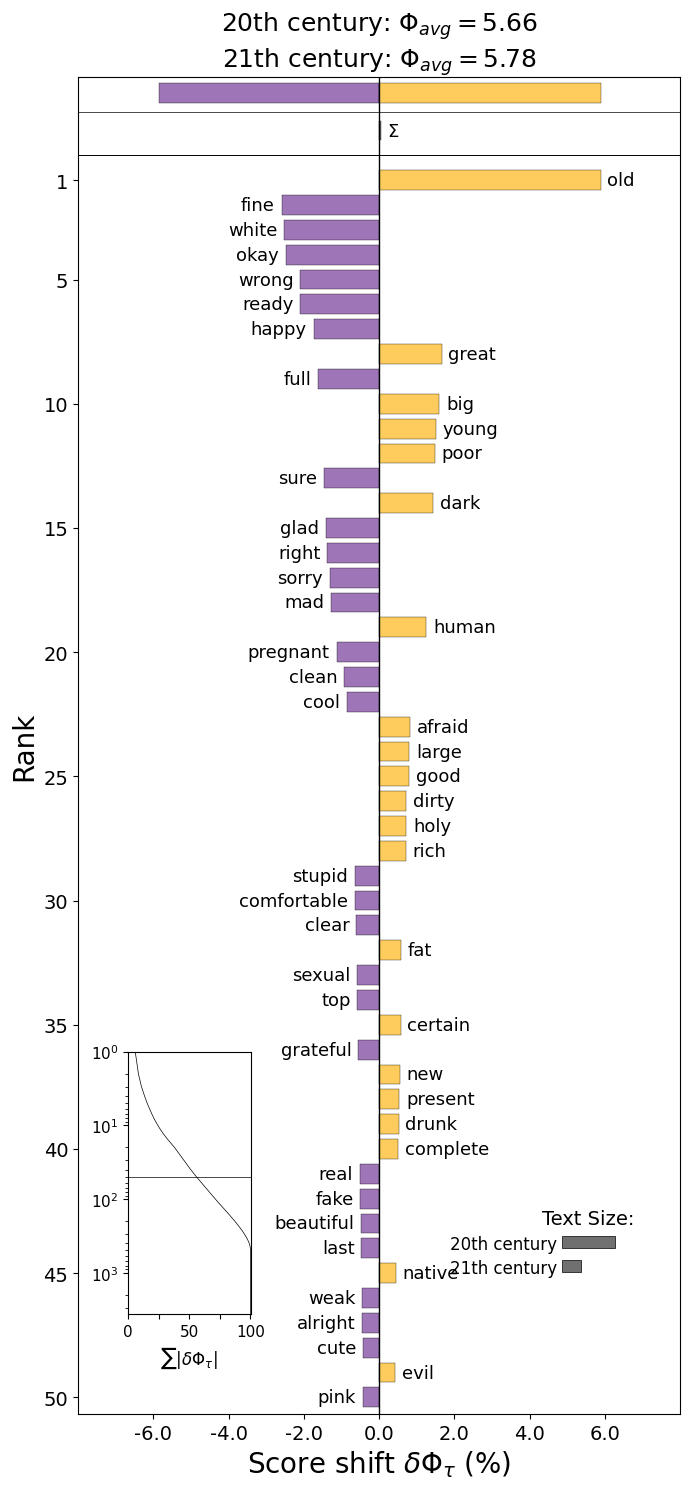

<Axes: title={'center': '20th century: $\\Phi_{avg}=$5.66\n21th century: $\\Phi_{avg}=$5.78'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [ ]:
sentiment_shift.get_shift_graph(detailed=False,
                                system_names=['20th century', '21th century'])

/usr/local/lib/python3.10/dist-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


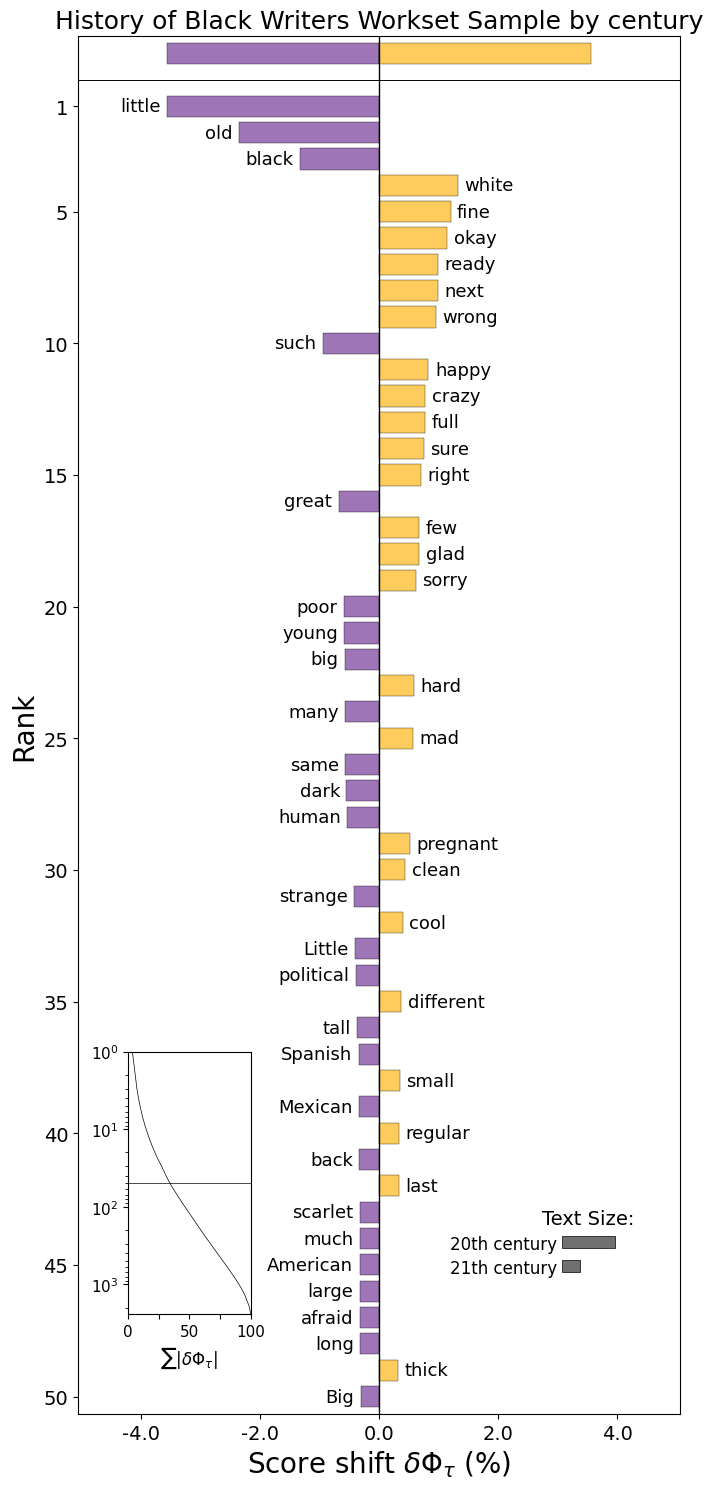

<Axes: title={'center': 'History of Black Writers Workset Sample by century'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [ ]:
#frequency
first_item_frequency = century_20_common_wc
second_item_frequency = century_21_common_wc
proportion_shift = sh.ProportionShift(type2freq_1=first_item_frequency,
                                      type2freq_2=second_item_frequency)
proportion_shift.get_shift_graph(system_names = ['20th century', '21th century'],
                                 title='History of Black Writers Workset Sample by century')


/usr/local/lib/python3.10/dist-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


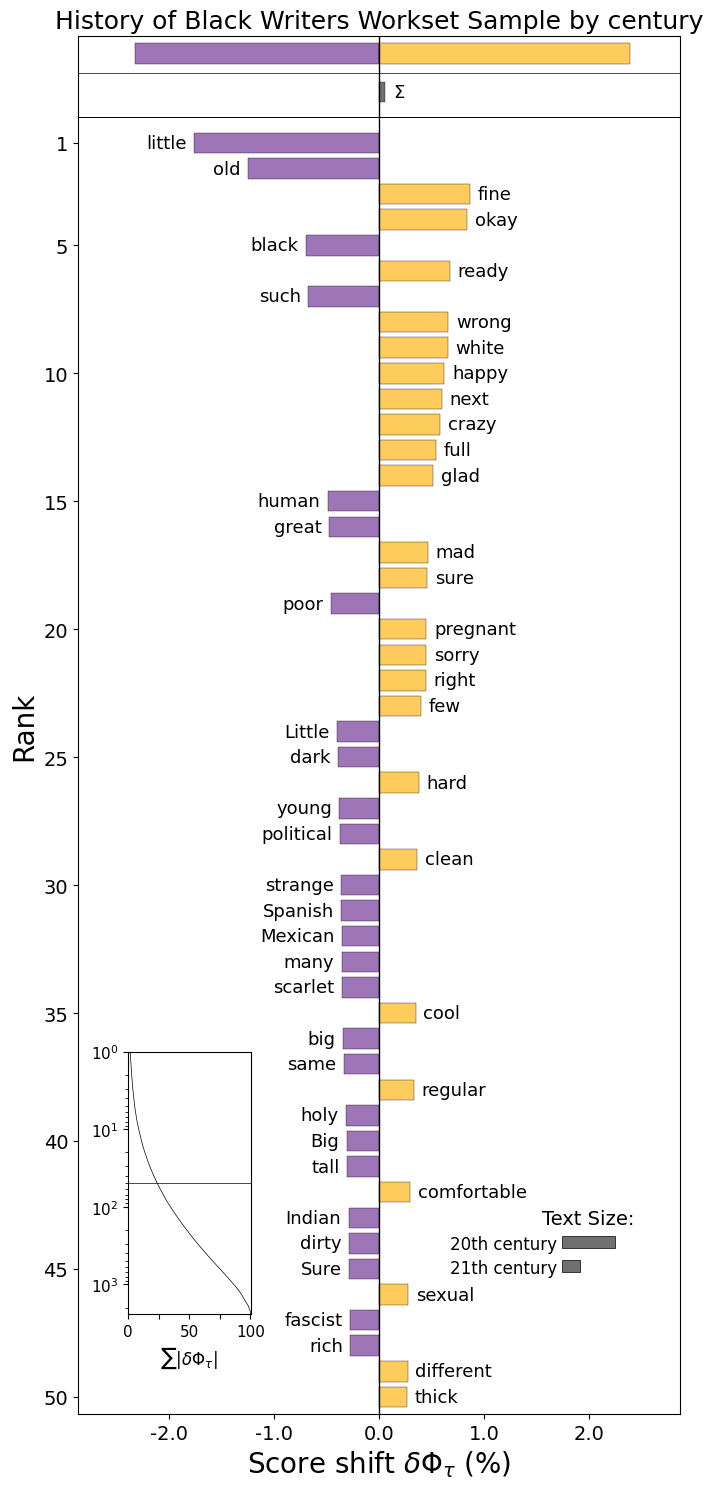

<Axes: title={'center': 'History of Black Writers Workset Sample by century'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [ ]:
entropy_shift = sh.EntropyShift(type2freq_1=first_item_frequency,
                                type2freq_2=second_item_frequency,
                                base=2)

entropy_shift.get_shift_graph(system_names = ['20th century', '21th century'],
                                 title='History of Black Writers Workset Sample by century')
